In [1]:
# Simulation conducted for Lambda = 0.002

In [9]:
import numpy as np
from scipy import interpolate

In [3]:
%run /storage/af/user/jmina/data_parser_0803.py


In [4]:
df_q = two_d_arraymaker(5, 3, '0805', 'Q')
df_q

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,,250.000000,277.777800,305.555600,333.333300,361.111100,388.888900,416.666700,444.444400,472.222200,...,2.750000e+03,2.777778e+03,2.805556e+03,2.833333e+03,2.861111e+03,2.888889e+03,2.916667e+03,2.944444e+03,2.972222e+03,3.000000e+03
1,0.002,0.000092,0.003601,0.002777,0.002113,0.001614,0.001236,0.000958,0.000758,0.000614,...,3.603000e-07,3.404000e-07,3.280000e-07,3.178000e-07,3.074000e-07,2.922000e-07,2.847000e-07,2.757000e-07,2.679000e-07,2.594000e-07
2,0.00450505,0.000467,0.018271,0.014090,0.010721,0.008189,0.006271,0.004859,0.003844,0.003116,...,1.828115e-06,1.727145e-06,1.664229e-06,1.612476e-06,1.559708e-06,1.482585e-06,1.444531e-06,1.398866e-06,1.359290e-06,1.316162e-06
3,0.0070101,0.001130,0.044240,0.034116,0.025959,0.019829,0.015185,0.011764,0.009307,0.007546,...,4.426422e-06,4.181943e-06,4.029604e-06,3.904293e-06,3.776526e-06,3.589788e-06,3.497647e-06,3.387079e-06,3.291253e-06,3.186827e-06
4,0.00951515,0.002083,0.081507,0.062856,0.047827,0.036532,0.027976,0.021675,0.017148,0.013902,...,8.155220e-06,7.704793e-06,7.424125e-06,7.193253e-06,6.957854e-06,6.613809e-06,6.444050e-06,6.240339e-06,6.063790e-06,5.871396e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.23998,1.324721,51.845671,39.982068,30.422078,23.237687,17.795404,13.787119,10.907603,8.842991,...,5.187447e-03,4.900935e-03,4.722405e-03,4.575550e-03,4.425815e-03,4.206972e-03,4.098990e-03,3.969412e-03,3.857111e-03,3.734731e-03
97,0.242485,1.352522,52.933711,40.821138,31.060520,23.725357,18.168861,14.076457,11.136512,9.028571,...,5.296311e-03,5.003787e-03,4.821510e-03,4.671573e-03,4.518696e-03,4.295260e-03,4.185012e-03,4.052714e-03,3.938056e-03,3.813109e-03
98,0.24499,1.380611,54.033051,41.668920,31.705592,24.218090,18.546196,14.368800,11.367798,9.216079,...,5.406306e-03,5.107706e-03,4.921644e-03,4.768593e-03,4.612541e-03,4.384465e-03,4.271927e-03,4.136882e-03,4.019843e-03,3.892300e-03
99,0.247495,1.408989,55.143688,42.525416,32.357293,24.715888,18.927409,14.664148,11.601460,9.405513,...,5.517432e-03,5.212694e-03,5.022808e-03,4.866610e-03,4.707351e-03,4.474586e-03,4.359736e-03,4.221915e-03,4.102470e-03,3.972306e-03


In [5]:
x = df_q.iloc[0, 1:]
y = df_q.iloc[1:, 0]
cross_values = df_q.iloc[1:, 1:]


Text(0.5, 1.0, 'Quark Fusion Cross Sections')

<Figure size 432x288 with 0 Axes>

<Figure size 432x360 with 0 Axes>

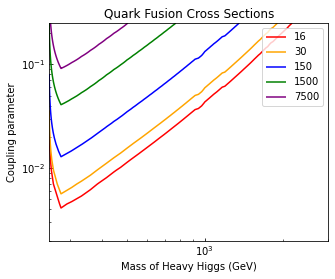

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'

X, Y = np.meshgrid(x, y)
Z = cross_values



# Create a simple contour plot with labels using default colors.  The
# inline argument to clabel will control whether the labels are draw
# over the line segments of the contour, removing the lines beneath
# the label
plt.figure()

plt.figure().set_figheight(5)
plt.figure().set_figwidth(5)

CS = plt.contour(X, Y, Z, [0.016, 0.030, 0.15, 1.5, 7.5], colors=['red','orange','blue','green','purple'])
#plt.clabel(CS, inline=1, fontsize=10)
#plt.title('Simplest default with labels')

labels = ['16', '30', '150', '1500', '7500']
for i in range(len(labels)):
    CS.collections[i].set_label(labels[i])

plt.legend(loc='best')

plt.loglog()

plt.ylabel("Coupling parameter")
plt.xlabel("Mass of Heavy Higgs (GeV)")

plt.title("Quark Fusion Cross Sections")

#plt.savefig('/storage/af/user/jmina/Plots/Daniel_Plots/Fig2/Plot1.jpg')
#plt.savefig('/storage/af/user/jmina/Plots/Daniel_Plots/Fig2/Plot1.png')
#plt.savefig('/storage/af/user/jmina/Plots/Daniel_Plots/Fig2/Plot1.pdf')

#plt.ylim([0.0001, 0.05])


In [7]:
df_g = two_d_arraymaker(5, 3, '0803', 'G')

In [15]:
df_g

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,,250.00000,394.7368,539.47370,684.21050,828.94740,973.68420,1118.42100,1263.15800,1407.89500,...,1697.3680,1842.1050,1986.8420,2131.5790,2276.3160,2421.0530,2565.7890,2710.5260,2855.2630,3000.0000
1,0.002,0.03367,0.0904,0.05763,0.04449,0.04167,0.04432,0.05135,0.06158,0.07686,...,0.1213,0.1527,0.1911,0.2378,0.2944,0.3613,0.4405,0.5324,0.6386,0.7617
2,0.00450505,0.03367,0.0904,0.05763,0.04449,0.04167,0.04432,0.05135,0.06158,0.07686,...,0.1213,0.1527,0.1911,0.2378,0.2944,0.3613,0.4405,0.5324,0.6386,0.7617
3,0.0070101,0.03367,0.0904,0.05763,0.04449,0.04167,0.04432,0.05135,0.06158,0.07686,...,0.1213,0.1527,0.1911,0.2378,0.2944,0.3613,0.4405,0.5324,0.6386,0.7617
4,0.00951515,0.03367,0.0904,0.05763,0.04449,0.04167,0.04432,0.05135,0.06158,0.07686,...,0.1213,0.1527,0.1911,0.2378,0.2944,0.3613,0.4405,0.5324,0.6386,0.7617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.23998,0.03367,0.0904,0.05763,0.04449,0.04167,0.04432,0.05135,0.06158,0.07686,...,0.1213,0.1527,0.1911,0.2378,0.2944,0.3613,0.4405,0.5324,0.6386,0.7617
97,0.242485,0.03367,0.0904,0.05763,0.04449,0.04167,0.04432,0.05135,0.06158,0.07686,...,0.1213,0.1527,0.1911,0.2378,0.2944,0.3613,0.4405,0.5324,0.6386,0.7617
98,0.24499,0.03367,0.0904,0.05763,0.04449,0.04167,0.04432,0.05135,0.06158,0.07686,...,0.1213,0.1527,0.1911,0.2378,0.2944,0.3613,0.4405,0.5324,0.6386,0.7617
99,0.247495,0.03367,0.0904,0.05763,0.04449,0.04167,0.04432,0.05135,0.06158,0.07686,...,0.1213,0.1527,0.1911,0.2378,0.2944,0.3613,0.4405,0.5324,0.6386,0.7617


In [14]:
df_g.iloc[1,1:]

1     0.03367
2      0.0904
3     0.05763
4     0.04449
5     0.04167
6     0.04432
7     0.05135
8     0.06158
9     0.07686
10    0.09658
11     0.1213
12     0.1527
13     0.1911
14     0.2378
15     0.2944
16     0.3613
17     0.4405
18     0.5324
19     0.6386
20     0.7617
Name: 1, dtype: object

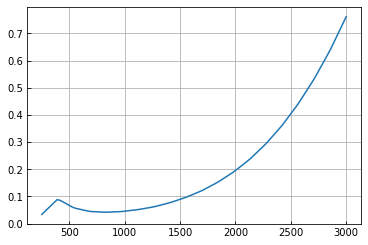

In [18]:
interp = interpolate.interp1d(df_g.iloc[0,1:], df_g.iloc[1,1:], kind = 'linear')
cross_g = interp(x_n)


plt.plot(x, cross_g, "-", label = "Linear")
plt.grid()
plt.show()


In [37]:
frame_new = []
for n in range(len(df_q) - 1):
    frame_new.append(np.array(df_q.iloc[n+1,1:]) + cross_g)


Text(0.5, 1.0, 'Quark and Gluon Fusion Cross Sections')

<Figure size 432x288 with 0 Axes>

<Figure size 432x360 with 0 Axes>

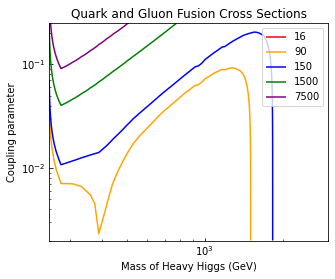

In [36]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'

X, Y = np.meshgrid(x, y)
Z_new = frame_new



# Create a simple contour plot with labels using default colors.  The
# inline argument to clabel will control whether the labels are draw
# over the line segments of the contour, removing the lines beneath
# the label
plt.figure()

plt.figure().set_figheight(5)
plt.figure().set_figwidth(5)

CS = plt.contour(X, Y, Z_new, [0.016, 0.09, 0.15, 1.5, 7.5], colors=['red','orange','blue','green','purple'])
#plt.clabel(CS, inline=1, fontsize=10)
#plt.title('Simplest default with labels')

labels = ['16', '90', '150', '1500', '7500']
for i in range(len(labels)):
    CS.collections[i].set_label(labels[i])

plt.legend(loc='best')

plt.loglog()

plt.ylabel("Coupling parameter")
plt.xlabel("Mass of Heavy Higgs (GeV)")

plt.title("Quark and Gluon Fusion Cross Sections")

#plt.savefig('/storage/af/user/jmina/Plots/Daniel_Plots/Fig2/Plot1.jpg')
#plt.savefig('/storage/af/user/jmina/Plots/Daniel_Plots/Fig2/Plot1.png')
#plt.savefig('/storage/af/user/jmina/Plots/Daniel_Plots/Fig2/Plot1.pdf')

#plt.ylim([0.0001, 0.05])
